<a href="https://colab.research.google.com/github/mgarciasanes/03MAIR---Algoritmos-de-Optimizacion---2019/blob/master/AG2/ManuelGarciaSanesAG2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>AG2 - Actividad Guiada</h1>

<h2>Manuel Garcia Sanes </h2>

 [URL](https://github.com/mgarciasanes/03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/AG2)



In [84]:
import math
import random

def distancia(A,B):
  if type(A) is int or type(A) is float:
    return abs(B-A)
  else:
    return math.sqrt(sum([  (A[i]-B[i])**2  for i in range(len(A)) ]))
      
        
N=100
LISTA_2D = [ (random.randrange(1,N*10),random.randrange(1,N*10) ) for _ in range(N)]

#Fuerza Bruta
def distancia_fuerza_bruta(L):
  mejor_distancia=10000
  A,B = (),()
  
  for i in range(len(L)) :
    for j in range(i+1 , len(L)):
      D=distancia(L[i],L[j])
      if D < mejor_distancia:
        mejor_distancia=D
        A,B=L[i],L[j]
  return [A,B]


#Divide y venceras
def distancia_divide_y_venceras(L):
  if len(L) <10:
    return distancia_fuerza_bruta(L)
  LISTA_IZQ = sorted(L, key=lambda x:  x[0])[:len(L)//2]
  LISTA_DER = sorted(L, key=lambda x:  x[0])[len(L)//2:]
  PUNTOS_IZQ=distancia_divide_y_venceras(LISTA_IZQ)
  PUNTOS_DER=distancia_divide_y_venceras(LISTA_DER)
  return distancia_divide_y_venceras(PUNTOS_IZQ+PUNTOS_DER)

  
distancia_divide_y_venceras(LISTA_2D)


    
                  


[(156, 390), (158, 386)]

In [0]:
import numpy as np
import pandas as pd

def puntos_mas_cercanos_fuerza_bruta_n(ARREGLO):
    if len(ARREGLO)<=1:
      return 0,[0,0]
    puntos_mas_cercanos={'p1':0,'p2':0,'distancia_menor':1000000}
    for i in range(ARREGLO.shape[0]):
      for ii in range(ARREGLO[i+1:].shape[0]):
        distancia=np.linalg.norm(ARREGLO[i]-ARREGLO[i+1:][ii])
        if distancia < puntos_mas_cercanos['distancia_menor']:
          puntos_mas_cercanos={'p1':ARREGLO[i],'p2':ARREGLO[i+1:][ii],'distancia_menor':distancia}   
    return puntos_mas_cercanos['distancia_menor'],[puntos_mas_cercanos['p1'],puntos_mas_cercanos['p2']]
  
  
  
def puntos_mas_cercanos_divide_venceras_n(ARREGLO):
  
  if len(ARREGLO)<=4:
    return puntos_mas_cercanos_fuerza_bruta_n(ARREGLO)
      
  G1=ARREGLO[:len(ARREGLO)//2]
  G2=ARREGLO[len(ARREGLO)//2:]
  pivote=abs(G2[0][0]+G1[-1][0])/2    

  distancia_minima_g1,p1=puntos_mas_cercanos_divide_venceras_n(G1)
  distancia_minima_g2,p2=puntos_mas_cercanos_divide_venceras_n(G2)
   
  if distancia_minima_g1<distancia_minima_g2:
    distancia_minima_de_g1_g2=distancia_minima_g1
    p=p1
  else:
    distancia_minima_de_g1_g2=distancia_minima_g2
    p=p2
    
  interseccion=np.empty((0,ARREGLO.shape[1]), int)
  g1_hay_puntos=False
  g2_hay_puntos=False
  for i in G1:
      if abs(pivote-i[0])<distancia_minima_de_g1_g2:
        interseccion=np.append(interseccion, np.array([i]), axis=0)
        g1_cerca=True
  for i in G2:
      if abs(i[0]-pivote)<distancia_minima_de_g1_g2:
        interseccion=np.append(interseccion, np.array([i]), axis=0)
        g2_cerca=True
  if g1_hay_puntos and g2_hay_puntos:
      if (len(G1)+len(G2) > len(interseccion) and len(interseccion)>4):
          minima_distancia_interseccion,p_int=puntos_mas_cercanos_divide_venceras_n(interseccion)
      else:
          minima_distancia_interseccion,p_int=puntos_mas_cercanos_fuerza_bruta_n(interseccion)
      if minima_distancia_interseccion < distancia_minima_de_g1_g2:
        return minima_distancia_interseccion,p_int
      else:
        return distancia_minima_de_g1_g2,p
  else:
      return distancia_minima_de_g1_g2,p
    
    
    

algoritmos=[puntos_mas_cercanos_divide_venceras_n,puntos_mas_cercanos_fuerza_bruta_n]
dimensions=[1,2,4,8]
puntos=[100,200,500,1000,2000,5000]
resultados={"Tiempos":[],"Algortimo":[], "Dimension":[], "Puntos":[]}


for d in dimensions:
  for p in puntos:
    for a in algoritmos:
      LISTA=np.random.randint(1000, size=(p, d))
      LISTA=LISTA[LISTA[:,0].argsort()]
      inicio = time()
      a(LISTA)
      t = float(time() - inicio)
      resultados["Tiempos"].append(t)
      resultados["Algortimo"].append(str(a.__name__))
      resultados["Dimension"].append(d)
      resultados["Puntos"].append(p)


    



Dimension
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Tiempos, dtype: object

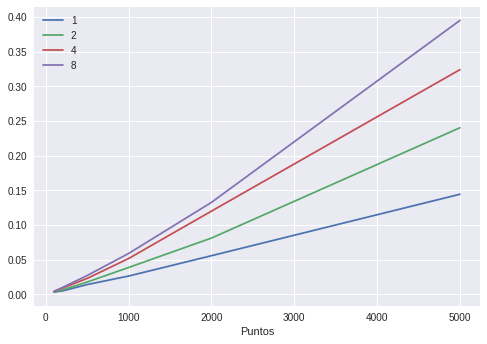

In [82]:



mypd=pd.DataFrame(resultados)
mypd.set_index('Puntos', inplace=True)
display(mypd[mypd["Algortimo"]=="puntos_mas_cercanos_divide_venceras_n"].groupby('Dimension')['Tiempos'].plot(legend=True))


Dimension
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
4    AxesSubplot(0.125,0.125;0.775x0.755)
8    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Tiempos, dtype: object

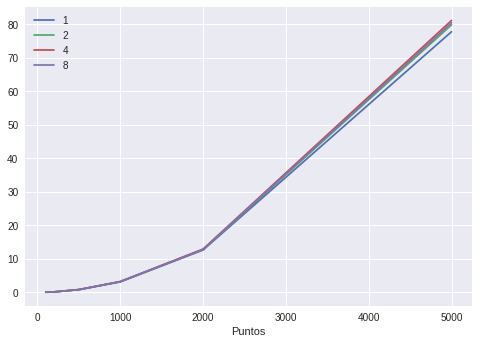

In [83]:
display(mypd[mypd["Algortimo"]=="puntos_mas_cercanos_fuerza_bruta_n"].groupby('Dimension')['Tiempos'].plot(legend=True))

In [85]:
TARIFAS = [ [0,5,4,3,999,999,999], [999,0,999,2,3,999,11], [999,999, 0,1,999,4,10], [999,999,999, 0,5,6,9], [999,999, 999,999,0,999,4], [999,999, 999,999,999,0,3], [999,999,999,999,999,999,0] ]

def Precios(TARIFAS):
  N = len(TARIFAS[0])
  PRECIOS = [ [9999]*N for i in [9999]*N ]
  RUTAS    = [ [""]*N for i in [9999]*N ]
  for i in range(N-1):
    for j in range(i+1,N):
      MIN = TARIFAS[i][j]
      RUTAS[i][j] = i
      
      for k in range(i,j):
        if PRECIOS[i][k]+ TARIFAS[k][j] < MIN:
          MIN = min( MIN , PRECIOS[i][k]+ TARIFAS[k][j] )
          RUTAS[i][j] = k
      PRECIOS[i][j] = MIN
      
  return PRECIOS, RUTAS


PRECIOS, RUTAS = Precios(TARIFAS)
print(PRECIOS)
print()
print(RUTAS)

def calcular_ruta(RUTAS, desde, hasta):
  print(RUTAS)
  print(desde)
  print(hasta)
  if desde == hasta: 
    #print("Ir a :" + str(desde)) 
    return desde 
  else: return str(calcular_ruta(RUTAS, desde, RUTAS[desde][hasta])) + ',' + str(RUTAS[desde][hasta]) 
                  
print("\nLa ruta es:") 
calcular_ruta(RUTAS, 0,6)
                  

[[9999, 5, 4, 3, 8, 8, 11], [9999, 9999, 999, 2, 3, 8, 7], [9999, 9999, 9999, 1, 6, 4, 7], [9999, 9999, 9999, 9999, 5, 6, 9], [9999, 9999, 9999, 9999, 9999, 999, 4], [9999, 9999, 9999, 9999, 9999, 9999, 3], [9999, 9999, 9999, 9999, 9999, 9999, 9999]]

[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]

La ruta es:
[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]
0
6
[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5], ['', '', '', '', '', '', '']]
0
5
[['', 0, 0, 0, 1, 2, 5], ['', '', 1, 1, 1, 3, 4], ['', '', '', 2, 3, 2, 5], ['', '', '', '', 3, 3, 3], ['', '', '', '', '', 4, 4], ['', '', '', '', '', '', 5

'0,0,2,5'